<a href="https://colab.research.google.com/github/ssuxmin/tmp/blob/main/chap_2_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%88%98%ED%95%99%EC%A0%81_%EA%B5%AC%EC%84%B1_%EC%9A%94%EC%86%8C(%EC%BD%94%EB%93%9C_%EC%97%B0%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 신경망과의 첫 만남

**(코드 2-1) 케라스에서 Mnist 데이터셋 적재**


In [128]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()   
#training set(훈련 세트), test set(테스트 세트)

In [129]:
train_images.shape

(60000, 28, 28)

In [130]:
len(train_labels)

60000

In [131]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [132]:
test_images.shape

(10000, 28, 28)

In [133]:
len(test_labels)

10000

In [134]:
len(train_images)

60000

In [135]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**(코드 2-2) 신경망 구조**

In [136]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# output이 512 였으면 512개가 그다음의 layer의 input이 된다.

In [137]:
model

**(코드 2-3) 컴파일 단계**

In [138]:
model.compile(optimizer="rmsprop",                        # 모델이 옳은 방향으로 학습될 수 있도록 도움을 줌
              loss="sparse_categorical_crossentropy",    # 모델 업데이트
              metrics=["accuracy"])

**(코드2-4) 이미지 데이터 준비하기**

In [139]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32")/255

**(코드2-5) 모델 훈련하기**

In [140]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2652 - accuracy: 0.9238
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1089 - accuracy: 0.9676
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0704 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0522 - accuracy: 0.9842
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0383 - accuracy: 0.9883


**(코드2-6) 모델을 사용하여 예측 만들기**

In [141]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 57ms/step


array([1.3786723e-07, 3.4905114e-09, 1.6071883e-05, 1.3297814e-04,
       3.6394276e-10, 9.7550540e-08, 9.2989266e-13, 9.9984503e-01,
       6.2101229e-08, 5.6689005e-06], dtype=float32)

In [142]:
predictions

array([[1.37867232e-07, 3.49051144e-09, 1.60718828e-05, 1.32978137e-04,
        3.63942765e-10, 9.75505401e-08, 9.29892665e-13, 9.99845028e-01,
        6.21012290e-08, 5.66890049e-06],
       [1.35109246e-07, 2.54175757e-06, 9.99985039e-01, 9.71144436e-06,
        2.31093329e-13, 4.34610797e-07, 6.96164904e-08, 3.65767150e-13,
        1.97121676e-06, 5.10731431e-13],
       [9.58060227e-08, 9.99345958e-01, 8.72749588e-05, 8.76425656e-06,
        1.96907247e-04, 5.41538020e-06, 2.73987553e-06, 1.70345316e-04,
        1.81684431e-04, 1.00279988e-06],
       [9.99945939e-01, 1.83794979e-09, 3.70984490e-05, 2.00844653e-07,
        1.70434244e-08, 8.37227105e-07, 1.01546357e-05, 3.97700296e-06,
        3.59638819e-10, 1.75740297e-06],
       [1.23321456e-06, 2.56425103e-10, 1.80179291e-06, 5.85968740e-09,
        9.98336375e-01, 1.59061493e-08, 2.27897908e-06, 7.85732482e-06,
        2.15225600e-06, 1.64842815e-03],
       [1.45210666e-09, 9.99875784e-01, 2.70064419e-07, 5.46415663e-07,
   

In [143]:
predictions[1]

array([1.3510925e-07, 2.5417576e-06, 9.9998504e-01, 9.7114444e-06,
       2.3109333e-13, 4.3461080e-07, 6.9616490e-08, 3.6576715e-13,
       1.9712168e-06, 5.1073143e-13], dtype=float32)

In [144]:
predictions[0].argmax()

7

In [145]:
predictions[0][7]

0.999845

In [146]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [147]:
test_labels[0]

7

**(코드2-7) 새로운 데이터에서 모델 평가**

In [148]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

313/313 [==============================] - 2s 5ms/step - loss: 0.0619 - accuracy: 0.9813
테스트 정확도: 0.9812999963760376


# 2.2 신경망을 위한 데이터 표현

###스칼라(랭크-0 텐서)

In [149]:
import numpy as np
x= np.array(12)
x

array(12)

In [150]:
x.ndim

0

### 벡터(랭크-1 텐서)

In [151]:
x= np.array([12,3,6,14,7])    # 5개의 원소 = 5차원 벡터

# 5D 벡터 : 하나의 축을 따라 5개의 차원을 가진 것
# 5D 텐서 : 5개의 축을 가진 것

In [152]:
x

array([12,  3,  6, 14,  7])

In [153]:
x.ndim

1

### 행렬(랭크-2 텐서)

In [154]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [155]:
x.ndim

2

### 랭크-3 텐서 와 더 높은 랭크의 텐서

In [156]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [157]:
x.ndim

3

### 핵심 속성

In [158]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [159]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [160]:
train_images.ndim    # 축의 갯수

3

In [161]:
train_images.shape # 배열의 크기

(60000, 28, 28)

In [162]:
train_images.dtype  # 데이터 타입

dtype('uint8')

**(코드 2-8)다섯 번째 이미지 출력하기**

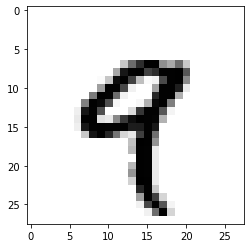

In [163]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

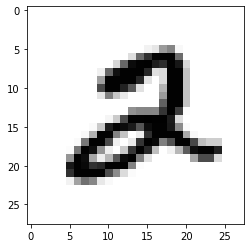

In [164]:
import matplotlib.pyplot as plt
digit = train_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

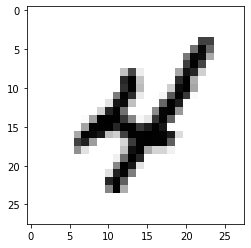

In [165]:
import matplotlib.pyplot as plt
digit = train_images[9]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [166]:
train_labels[4]

9

In [167]:
train_labels[5]

2

In [168]:
train_labels[9]

4

### 2.2.6 넘파이로 텐서 조작하기

In [169]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [170]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [171]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [172]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [173]:
my_slice =train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### 2.2.7 배치 데이터

In [174]:
batch = train_images[:128]
batch.shape

(128, 28, 28)

In [175]:
batch = train_images[128:256]
batch.shape

(128, 28, 28)

In [176]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]
batch.shape

(128, 28, 28)

### 2.2.8 텐서의 실제 사례 
### 2.2.9 벡터 데이터
### 2.2.10 시계열 데이터 또는 시퀀스 데이터
### 2.2.11 이미지 데이터
### 2.2.12 비디오 데이터

# 2.3 신경마의 톱니바퀴 : 텐서 연산


### 2.3.1 원소별 연산

In [177]:
import numpy as np 
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

In [178]:
def naive_relu(x):
    assert len(x.shape) == 2              # x는 랭크-2 넘파이 배열
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [179]:
x.ndim

2

In [180]:
x.shape

(3, 5)

In [181]:
def naive_add(x, y):        # 랭크-2 텐서만 지원 가능!!!
    assert len(x.shape) == 2         # x와 y는 랭크-2 넘파이 배열
    assert x.shape == y.shape    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [182]:
x.ndim

2

In [183]:
x.shape

(3, 5)

In [184]:
import time                         

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 0.01 s


In [185]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("걸린 시간: {0:.2f} s".format(time.time() - t0))

걸린 시간: 1.88 s


### 2.3.2 브로드캐스팅

In [186]:
import numpy as np
X = np.random.random((32, 10))   # x는 크기가 (32,10)인 랜덤한 행렬
y = np.random.random((10,))      # y는 크기가 (10,)인 랜덤한 벡터터

In [187]:
y = np.expand_dims(y, axis=0)     # y의 크기는 (1,10) : y에 비어 있는 첫 번째 축을 추가한 것

In [188]:
Y = np.concatenate([y] * 32, axis=0)   # 축 0을 따라 y를 32번 반복하여 (32,10)인 Y를 얻음.

In [189]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [190]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)             # 출력 z 크기는 x와 동일하게 (64,3,32,10)임.

### 2.3.3 텐서 곱셈(np.dot) : 원소 개수가 같은 벡터끼리 점곱 가능

In [191]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [192]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1     # x와 y는 넘파이 벡터
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [193]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2     # x는 넘파이 행렬
    assert len(y.shape) == 1     # y는 넘파이 벡터
    assert x.shape[1] == y.shape[0]    # x의 두번째 차원 = y의 첫 번째 차원
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [194]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [195]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### 2.3.4 텐서 크기 변환

In [196]:
train_images = train_images.reshape((60000, 28 * 28))

In [197]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [198]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [199]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [200]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### 2.3.5 텐서 연산의 기하학적 해석

### 2.3.6 딥러닝의 기하학적 해석

# 2.4 신경망의 엔진 : 그레이디언트 기반 최적화

### 2.4.1 도함수란?

### 2.4.2 텐서 연산의 도함수

### 2.4.3 확률적 경사 하강법

1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y_true를 추출
2. x로 모델을 실행하고 예측 y_pred를 구한다 (정방향 패스)
3. 이 배치에서 y_pred와 y_true 사이의 오차를 측정하여 모델의 손실 계산
4. 모델의 파라미터에 대한 손실 함수의 gradient 계산 (역방향 패스)
5. gradient의 반대 방향으로 파라미터를 조금 이동시킨다. 학습률은 경사 하강법 과정의 속도를 조절하는 스칼라의 값이다.


### 2.4.4 도함수 연결 : 역적파 알고리즘

#### 연쇄 법칙
*loss_value= loss(y_true, softmax(dot(relu(inputs, W1)+b1), W2 )+ b2)*


In [201]:
def fg(x):
  x1 = g(x)
  y = f(x1)
  return y


  # grad(y,x) == grad(y, x1) * grad(x1, x)

In [202]:
def fghj(x):
  x1=j(x)
  x2=h(x1)
  x3=g(x2)
  y=f(x3)
  return y

*grad(y,x) == (grad(y,x3) * grad(x3,x2) * grad(x2, x1) * grad(x1,x))*

#### 텐서플로의 그레이디언트 테이프

In [204]:
import tensorflow as tf
x = tf.Variable(0.)   #초기값 0으로 스칼라 변수 생성
with tf.GradientTape() as tape:   # GradientTape 블록 시작
    y = 2 * x + 3  
grad_of_y_wrt_x = tape.gradient(y, x)

In [205]:
x = tf.Variable(tf.zeros((2, 2)))      # x는 행렬, 크기는 (2,2)고 초기값이 모두 0인 변수 생성
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)    # x= [[0,0],[0,0]]일 때 y =2*x+3의 곡률을 나타낸다.

In [206]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b         # matmul : tensorflow의 점곱 함수
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])    
# grad_of_y_wrt_W_and_b는 2개의 텐서를 담은 리스트. 각 텐서는 W, b와 크기가 같다.


# 첫 번째 예제 다시 살펴보기

**데이터 입력 -> 모델 -> 모델 컴파일 -> 훈련 반복** 

In [207]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [208]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [209]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [211]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 12ms/step - loss: 0.2635 - accuracy: 0.9235
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1076 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0702 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0509 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0386 - accuracy: 0.9886


### 2.5.1 텐서플로를 사용해 첫 번째 예제를 밑바닥부터 다시 구현하기

#### 단순한 Dense 클래스

In [216]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):    #__init__ : 생성자
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):    # 정방향 패스
        return self.activation(tf.matmul(inputs, self.W) + self.b)
                               
    @property
    def weights(self):     #층의 가중치를 추출하기 위한 메서드
        return [self.W, self.b]

In [217]:
dense1 = NaiveDense(5,3,activation=tf.nn.relu)

In [218]:
dense1

In [219]:
dense1.W

<tf.Variable 'Variable:0' shape=(5, 3) dtype=float32, numpy=
array([[0.08898715, 0.03278458, 0.05806719],
       [0.01473442, 0.06908911, 0.08677109],
       [0.08227675, 0.08547156, 0.06008452],
       [0.04525738, 0.02679275, 0.07474398],
       [0.07655016, 0.0945906 , 0.06095923]], dtype=float32)>

In [220]:
dense1.activation

<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>

In [221]:
dense1.weights

[<tf.Variable 'Variable:0' shape=(5, 3) dtype=float32, numpy=
 array([[0.08898715, 0.03278458, 0.05806719],
        [0.01473442, 0.06908911, 0.08677109],
        [0.08227675, 0.08547156, 0.06008452],
        [0.04525738, 0.02679275, 0.07474398],
        [0.07655016, 0.0945906 , 0.06095923]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

#### 단순한 Sequential 클래스

In [222]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [223]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [224]:
model.weights

[<tf.Variable 'Variable:0' shape=(784, 512) dtype=float32, numpy=
 array([[0.07355634, 0.07942367, 0.06761213, ..., 0.00889356, 0.03906621,
         0.05608571],
        [0.05762508, 0.03194259, 0.08041462, ..., 0.05828841, 0.07885515,
         0.0609763 ],
        [0.00924104, 0.05022935, 0.08597119, ..., 0.05141616, 0.00534644,
         0.03727077],
        ...,
        [0.08058587, 0.01093051, 0.01483176, ..., 0.00283271, 0.01850001,
         0.03568648],
        [0.00542966, 0.00394416, 0.07306457, ..., 0.05191959, 0.07399215,
         0.07011302],
        [0.07027487, 0.08507907, 0.01734774, ..., 0.06225945, 0.01459223,
         0.0578212 ]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0

#### 배치 제너레이터 (p.106) 와 훈련스텝 실행하기 비교해볼 것!!


In [225]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)   

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [226]:
generator1 = BatchGenerator(train_images, train_labels)

In [227]:
generator1.num_batches

469

In [228]:
train_labels[:128]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4], dtype=uint8)

In [229]:
generator1.next()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
        9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
        3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
        6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
        0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
        9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4], dtype=uint8))

In [230]:
train_labels[128:(128+128)]

array([1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3,
       4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2,
       9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7,
       4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3,
       0, 4, 6, 5, 2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4,
       6, 5, 8, 6, 3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3], dtype=uint8)

In [231]:
generator1.next()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3,
        4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2,
        9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7,
        4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3,
        0, 4, 6, 5, 2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4,
        6, 5, 8, 6, 3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3], dtype=uint8))

In [232]:
generator1.index

256

### 2.5.2 훈련 스텝 실행하기

1. 배치에 있는 이미지에 대해 모델의 예측 계산
2. 실제 레이블 사용하여 이 예측의 손실 값 계산 
3. 모델 가중치에 대한 손실의 gradient를 계산
4. 이 gradient의 반대 방향으로 가중치를 조금 이동


In [233]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [234]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)    # tensorflow 변수의 assing_sub 메서드는 -=와 동일

In [235]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)    # SGD = stochastic gradient

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### 2.5.3 전체 훈련 루프 (= 에포크의 반복)

In [236]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"에포크 {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"{batch_counter}번째 배치 손실: {loss:.2f}")

In [237]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

에포크 0
0번째 배치 손실: 6.38
100번째 배치 손실: 2.28
200번째 배치 손실: 2.24
300번째 배치 손실: 2.16
400번째 배치 손실: 2.29
에포크 1
0번째 배치 손실: 1.93
100번째 배치 손실: 1.92
200번째 배치 손실: 1.86
300번째 배치 손실: 1.78
400번째 배치 손실: 1.89
에포크 2
0번째 배치 손실: 1.60
100번째 배치 손실: 1.61
200번째 배치 손실: 1.53
300번째 배치 손실: 1.46
400번째 배치 손실: 1.57
에포크 3
0번째 배치 손실: 1.34
100번째 배치 손실: 1.37
200번째 배치 손실: 1.27
300번째 배치 손실: 1.24
400번째 배치 손실: 1.33
에포크 4
0번째 배치 손실: 1.13
100번째 배치 손실: 1.18
200번째 배치 손실: 1.06
300번째 배치 손실: 1.08
400번째 배치 손실: 1.15
에포크 5
0번째 배치 손실: 0.99
100번째 배치 손실: 1.04
200번째 배치 손실: 0.92
300번째 배치 손실: 0.95
400번째 배치 손실: 1.02
에포크 6
0번째 배치 손실: 0.88
100번째 배치 손실: 0.93
200번째 배치 손실: 0.81
300번째 배치 손실: 0.86
400번째 배치 손실: 0.93
에포크 7
0번째 배치 손실: 0.79
100번째 배치 손실: 0.85
200번째 배치 손실: 0.73
300번째 배치 손실: 0.78
400번째 배치 손실: 0.86
에포크 8
0번째 배치 손실: 0.73
100번째 배치 손실: 0.78
200번째 배치 손실: 0.67
300번째 배치 손실: 0.73
400번째 배치 손실: 0.80
에포크 9
0번째 배치 손실: 0.68
100번째 배치 손실: 0.72
200번째 배치 손실: 0.62
300번째 배치 손실: 0.68
400번째 배치 손실: 0.76


### 2.5.4 모델 평가하기

In [238]:
import numpy as np

In [239]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"정확도: {matches.mean():.2f}")

정확도: 0.82
